In [1]:
%pylab inline
import os
os.chdir("../")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import torch
from seisgan.networks import GeneratorMultiChannel
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Loading the generator network and the weights

In [3]:
generator = GeneratorMultiChannel()
new_state_dict = torch.load("checkpoints/generator_facies_multichannel_4_6790.pth")
generator.load_state_dict(new_state_dict)
generator.cpu()
generator.eval()

GeneratorMultiChannel(
  (network): Sequential(
    (0): Conv2d(50, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): PixelShuffle(upscale_factor=2)
    (4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): PixelShuffle(upscale_factor=2)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): PixelShuffle(upscale_factor=2)
    (12): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): PixelShuffle(upscale_factor=2)
    (16): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1),

## Case to create movie of

In [4]:
direc = "results_noise_25/results_27_sources"

## Load Latent Variables for Case

In [5]:
latents = []
for i in range(100):
    latents.append(np.load("./results/"+direc+"/test_"+str(i)+"/test_"+str(i)+"_"+str(i)+"_latents_0.npy"))
latents = np.array(latents)

In [6]:
final_latents = torch.from_numpy(latents[:, -1, 0])
with torch.no_grad():
    final_models = generator(final_latents)

In [7]:
final_models.size()

torch.Size([100, 3, 64, 128])

## Create posterior movie

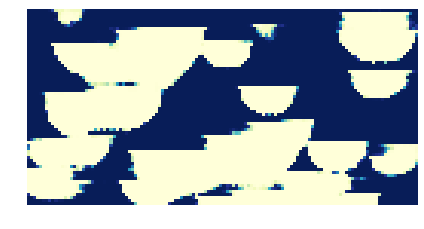

In [8]:
fig = plt.figure()
out_models = final_models[:, 0].numpy()
ims = []
for i in range(len(out_models)):
    plt.tight_layout()
    plt.axis('off')
    im = plt.imshow(out_models[i], animated=True, cmap="YlGnBu_r")    
    ims.append([im])
    

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=0)

ani.save("results/animations/movie_posterior.gif", writer='imagemagick')
plt.show()

## Create prior movie

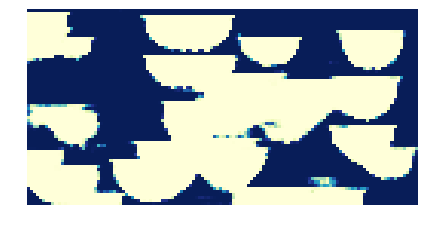

In [9]:
starting_latents = torch.from_numpy(latents[:, 0, 0])
with torch.no_grad():
    starting_models = generator(starting_latents)


fig = plt.figure()
out_models = starting_models[:, 0].numpy()
ims = []
for i in range(len(out_models)):
    plt.tight_layout()
    plt.axis('off')
    im = plt.imshow(out_models[i], animated=True, cmap="YlGnBu_r")
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=0)

ani.save("results/animations/movie_prior.gif", writer='imagemagick')

plt.show()